In [0]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

np.random.seed(42)
tf.set_random_seed(42)

In [0]:
def loadNpData():
  data = np.load('/content/drive/My Drive/ML_Data/iris_CNN/iris_data.npz')
  x_ld = data['x']
  y_ld = data['y']  
  
  return x_ld, y_ld

In [3]:
X, y = loadNpData()

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (500, 28, 28)
Shape of y:  (500, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size = 0.2, stratify = y, random_state = 42)

print("X_train.shape::::::::::::::::::", X_train.shape)
print("X_test.shape:::::::::::::::::::", X_test.shape)
print("y_train.shape::::::::::::::::::", y_train.shape)
print("y_test.shape:::::::::::::::::::", y_test.shape)

X_train.shape:::::::::::::::::: (400, 28, 28)
X_test.shape::::::::::::::::::: (100, 28, 28)
y_train.shape:::::::::::::::::: (400, 1)
y_test.shape::::::::::::::::::: (100, 1)


In [5]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print("X_train.shape::::::::::::::::::", X_train.shape)
print("X_test.shape:::::::::::::::::::", X_test.shape)

X_train.shape:::::::::::::::::: (400, 28, 28, 1)
X_test.shape::::::::::::::::::: (100, 28, 28, 1)


### Convolution structure

In [6]:
iris_model_CNN = keras.models.Sequential()
iris_model_CNN.add(keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", 
                                 activation = "relu", input_shape = [28,28,1]))
iris_model_CNN.add(keras.layers.MaxPooling2D(pool_size = 2))

iris_model_CNN.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = "same",activation = "relu"))
iris_model_CNN.add(keras.layers.MaxPooling2D(pool_size = 2))

iris_model_CNN.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))

W0807 18:18:38.659423 139868088457088 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
iris_model_CNN.add(keras.layers.Flatten())
iris_model_CNN.add(keras.layers.Dense(units = 28, activation = 'relu'))
iris_model_CNN.add(keras.layers.Dense(units = 14, activation = 'relu'))
iris_model_CNN.add(keras.layers.Dense(units = 7, activation = 'relu'))
iris_model_CNN.add(keras.layers.Dense(units = 1, activation = 'sigmoid')) #Since it is a binary classificai
iris_model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 28)                8

In [8]:
iris_model_CNN.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=10),
    keras.callbacks.ModelCheckpoint("/content/drive/My Drive/ML_Data/iris_CNN/iris_model.h5", save_best_only=True),
]
model_history_CNN = iris_model_CNN.fit(X_train,  y_train, epochs=500,
                    validation_split = 0.1,
                    callbacks=callbacks)

W0807 18:18:38.862889 139868088457088 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 360 samples, validate on 40 samples
Epoch 1/500
360/360 [==============================] - 2s 6ms/sample - loss: 1.8637 - acc: 0.5278 - val_loss: 0.9395 - val_acc: 0.6000
Epoch 2/500
360/360 [==============================] - 0s 303us/sample - loss: 0.7281 - acc: 0.6778 - val_loss: 0.5995 - val_acc: 0.6500
Epoch 3/500
360/360 [==============================] - 0s 166us/sample - loss: 0.5760 - acc: 0.6833 - val_loss: 0.7184 - val_acc: 0.6250
Epoch 4/500
360/360 [==============================] - 0s 165us/sample - loss: 0.5814 - acc: 0.6806 - val_loss: 0.6882 - val_acc: 0.6250
Epoch 5/500
360/360 [==============================] - 0s 161us/sample - loss: 0.4933 - acc: 0.7500 - val_loss: 0.7516 - val_acc: 0.6250
Epoch 6/500
360/360 [==============================] - 0s 171us/sample - loss: 0.4729 - acc: 0.7306 - val_loss: 0.7319 - val_acc: 0.8000
Epoch 7/500
360/360 [==============================] - 0s 163us/sample - loss: 0.3883 - acc: 0.8278 - val_loss: 0.7379 - val_acc: 0.750

In [0]:
bestModel = keras.models.load_model("/content/drive/My Drive/ML_Data/iris_CNN/iris_model.h5")

In [13]:
test_loss, test_accuracy = bestModel.evaluate(X_test, y_test)

print("Test loss{} and Test-accuracy {}".format(test_loss, test_accuracy))

100/100 [==============================] - 0s 655us/sample - loss: 0.5948 - acc: 0.6100
Test loss0.5947741854190827 and Test-accuracy 0.6100000143051147


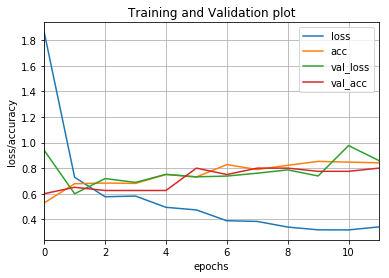

In [11]:
pd.DataFrame(model_history_CNN.history).plot()
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel("loss/accuracy")
plt.title("Training and Validation plot")
plt.show()